In [335]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [336]:
#Loading data in to base dataframe

df_base = pd.read_csv("Leads.csv")

In [337]:
df_base.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [338]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [339]:
df_base.shape

(9240, 37)

In [340]:
df_base.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [341]:
# Removing columns with 40% Null values

df= df_base.loc[:, df_base.isnull().mean() < .4]

In [342]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity'], dtype='object')

In [343]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [344]:
col = df.columns
for i in col:
    print(df[i].value_counts())

3e4b202b-5448-4483-a4df-0f31c906dc2d    1
915593f3-5db2-4a8f-8f7d-7936f6f00ca1    1
f698795a-be86-412a-bf93-c17c1d312691    1
eb3af10e-e134-44f1-89c1-4fb15e62eac7    1
15714157-5196-4915-b008-d1e857d09122    1
                                       ..
1af2e8bf-75c7-4a96-a337-c5d045057df3    1
69d457d3-2f54-4e7a-8b36-d62eee66072e    1
c0e60164-bed0-4177-ad15-93937310f5c6    1
72ce6863-35c0-408b-b6b5-02cee868dcff    1
599cc8e9-5d78-401e-b40f-adacbdacd51a    1
Name: Prospect ID, Length: 9240, dtype: int64
608255    1
596233    1
656682    1
592824    1
652580    1
         ..
631489    1
600768    1
598556    1
616923    1
655360    1
Name: Lead Number, Length: 9240, dtype: int64
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference         

No    9240
Name: Update me on Supply Chain Content, dtype: int64
No    9240
Name: Get updates on DM Content, dtype: int64
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64
Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64
No    9240
Name: I agree to pay the amount through cheque, dtype: int64
No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64
Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link C

In [345]:
# Dropping below columns as it has skew data 

df_using = df.drop(columns=['Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','Magazine','Newspaper Article','X Education Forums','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Search','Newspaper','What matters most to you in choosing a course','Do Not Call'])

In [346]:
df_using.shape

(9240, 19)

In [347]:
#changing select value in specalization and hear about X education  to 'Others' as not all the specialization or medium to know about education  is present in the dropdown

def other_add(x):
    if x == 'Select':
        return 'Other'
    else:
        return x
df_using['Specialization'] = df_using['Specialization'].apply(lambda x:other_add(x))
df_using['How did you hear about X Education'] = df_using['How did you hear about X Education'].apply(lambda x:other_add(x))

In [348]:
df_using.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'Tags', 'Lead Profile', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity'], dtype='object')

In [349]:
# Removing 'Lead Number','Country','City','Tags' as the columns are nt adding extra value to the data 

df_using = df_using.drop(columns=['Lead Number','Country','City','Tags','How did you hear about X Education'])

In [350]:
df_using.shape

(9240, 14)

In [351]:
df_using.isnull().sum()

Prospect ID                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
Lead Profile                              2709
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [352]:
df_using['Page Views Per Visit'] = df_using['Page Views Per Visit'].fillna(df_using['Page Views Per Visit'].median())
df_using['Page Views Per Visit'] = df_using['Page Views Per Visit'].fillna('Email Opened')
df_using['TotalVisits'] = df_using['TotalVisits'].fillna(df_using['TotalVisits'].median())

In [353]:
df_using.isnull().sum()

Prospect ID                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
Lead Profile                              2709
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [354]:
# Deleting the rows with null values as all the coumns seems adding values to the data 

df_using=df_using.dropna()

In [355]:
df_using.isnull().sum()

Prospect ID                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Lead Profile                              0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [356]:
df_using.shape

(6394, 14)

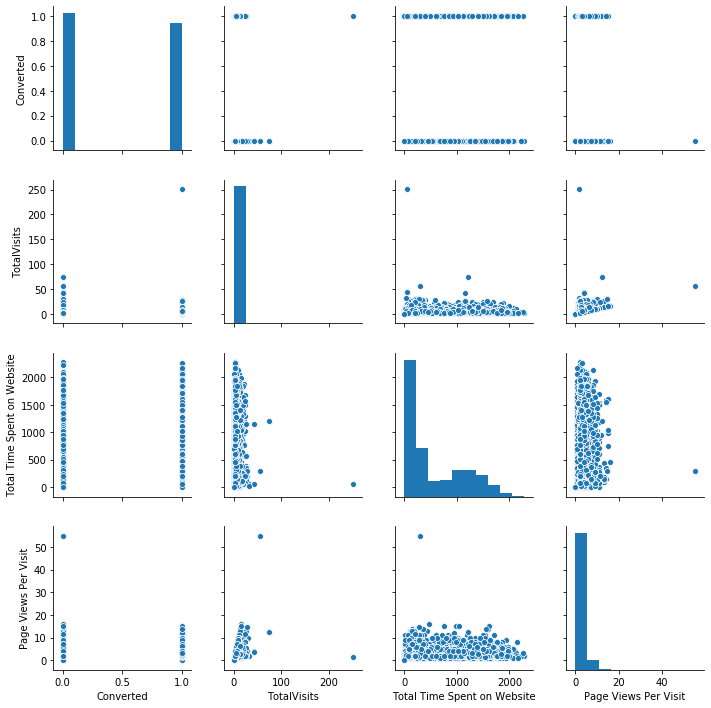

In [357]:
import seaborn as sns
sns.pairplot(df_using)

In [358]:
list1= ['Lead Origin','Lead Source','Last Activity','Specialization',
        'What is your current occupation','Lead Profile','Last Notable Activity']

dummies = pd.get_dummies(df_using[list1], drop_first= True)
dummies.shape


(6394, 74)

In [359]:
df_using = df_using.drop(list1,axis=1)

In [360]:
df_using = pd.concat([df_using,dummies], axis=1)

In [361]:
df_using.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,No,0,0.0,0,0.0,No,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,No,0,5.0,674,2.5,No,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,No,1,2.0,1532,2.0,Yes,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,No,0,1.0,305,1.0,No,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,No,1,2.0,1428,1.0,No,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [362]:
# Changing the YES / NO values to numeric boolen values 

def boolen(x):
    if x=='No':
        return 0
    else:
        return 1

df_using['Do Not Email'] = df_using['Do Not Email'].apply(lambda x:boolen(x))
df_using['A free copy of Mastering The Interview'] = df_using['A free copy of Mastering The Interview'].apply(lambda x:boolen(x))

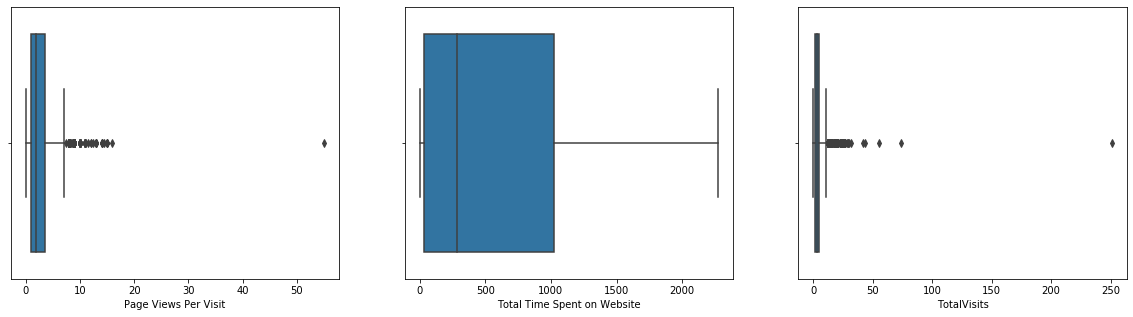

In [363]:
#checking for outliers
import matplotlib.pyplot as plt

list2 = ['Page Views Per Visit','Total Time Spent on Website','TotalVisits']
plt.figure(figsize=(20,5))
for i,col in enumerate(list2):
    plt.subplot(1,3,i+1)
    sns.boxplot(df_using[col])

In [364]:
df_using.shape

(6394, 81)

In [365]:
# Checking the outliers in details 

df_using[list2].describe(percentiles = (0.1,0.2,0.25,0.3,0.4,0.5,0.8,0.9,0.95,.99))

,Page Views Per Visit,Total Time Spent on Website,TotalVisits
count,6394.000000,6394.000000,6394.000000
mean,2.477915,536.450735,3.604629
std,2.162797,565.674973,4.844048
min,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000
20%,0.000000,0.000000,0.000000
25%,1.000000,35.000000,1.000000
30%,1.500000,79.000000,2.000000
40%,2.000000,176.200000,2.000000
50%,2.000000,288.000000,3.000000


In [366]:
df_using.corr()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Do Not Email,1.000000,-0.145566,0.016417,-0.051417,0.034574,0.050862,0.077613,-0.021623,-0.009122,0.084805,-0.009591,-0.059134,-0.004803,-0.036241,0.029345,-0.003396,0.046063,-0.027997,-0.017815,-0.004803,-0.003396,0.009427,-0.005883,-0.003396,-0.056432,0.578482,-0.034667,0.065149,-0.207992,-0.004803,-0.014164,-0.008640,-0.040551,0.053948,-0.004381,0.011099,0.268691,-0.006793,-0.003396,-0.010004,0.023063,0.036208,-0.004664,0.020903,0.014809,-0.017668,0.048261,0.015004,-0.029578,0.011630,-0.012507,-0.028578,0.020535,0.020309,0.042452,-0.005734,0.048252,-0.010194,-0.000382,-0.011752,0.053275,-0.051430,-0.004776,0.011495,-0.064197,0.021899,0.076540,0.323661,-0.031166,0.065149,-0.180407,-0.003396,-0.012255,0.080133,-0.006951,0.046442,-0.004517,-0.015954,0.257074,-0.003396
Converted,-0.145566,1.000000,0.009081,0.314426,-0.063327,-0.096138,-0.119268,0.290657,-0.018532,-0.134669,-0.020430,0.018672,0.018337,-0.045544,-0.035012,-0.012065,-0.012065,0.245780,-0.022443,0.000637,0.012965,0.144300,-0.006447,-0.012065,-0.139056,-0.124859,-0.033863,0.018337,-0.024034,0.018337,-0.036503,0.035569,-0.164445,-0.087029,0.283869,-0.019516,-0.032871,-0.011617,-0.012065,0.016145,-0.018101,-0.015660,0.028197,0.027899,-0.006327,0.024569,-0.006139,-0.022655,0.048163,-0.001207,0.030740,-0.092677,-0.018810,0.008409,-0.005268,0.005316,-0.012075,0.038920,0.011450,-0.034811,-0.258609,0.303474,0.059507,-0.065598,0.340626,-0.212275,-0.177327,-0.052469,-0.0265

In [367]:
## Performing RFE to eleminate variables
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

y=df_using['Converted']
X=df_using.drop(['Converted','Prospect ID'],axis=1)

In [368]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [369]:
# Scaling the continious variables

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train[list2] = scaler.fit_transform(X_train[list2])

In [370]:
df_using['Converted'].value_counts()

0    3312
1    3082
Name: Converted, dtype: int64

In [371]:
#Checking Convertion rate

converted_value=100*(sum(y)/len(y.index))
converted_value

48.201438848920866

## Building Model

In [372]:
import statsmodels.api as sm
logreg=LogisticRegression()

In [373]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4475
Model:                            GLM   Df Residuals:                     4400
Model Family:                Binomial   Df Model:                           74
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 02 Mar 2020   Deviance:                          nan
Time:                        11:33:05   Pearson chi2:                 4.99e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                -7.725e+14   1.05e+08  -7.35e+06      0.000   -7.72e+14   -7.72e+14
Do Not Email                                         -7.618e+14   5.31e+06  -1.43e+08      0.000   -7.62e+14   -7.62e+14
TotalVisits                                           2.041e+14   1.42e+06   1.44e+08      0.000    2.04e+14    2.04e+14
Total Time Spent on Website                           2.565e+14   1.16e+06   2.21e+08      0.000    2.57e+14    2.57e+14
Page Views Per Visit                                 -7.322e+13   1.52e+06  -4.81e+07      0.000   -7.32e+13   -7.32e+13
A free copy of Mastering The Interview                8.241e+13   3.07e+06   2.69e+07      0.000    8.24e+13    8.24e+13
Lead Origin_Landing Page Submission                   -1.88e+14    3.8e+06  -4.94e+07      0.000   -1.88e+14   -1.88e+14
Lead Origin_Lead Add Form                             3.658e+15   4.83e+07   7.57e+07      0.000    3.66e+15    3.66e+15
Lead Origin_Lead Import                               1.765e+15   3.47e+07   5.09e+07      0.000    1.76e+15    1.76e+15
Lead Source_Direct Traffic                            2.958e+15    6.8e+07   4.35e+07      0.000    2.96e+15    2.96e+15
Lead Source_Facebook                                  1.765e+15   3.47e+07   5.09e+07      0.000    1.76e+15    1.76e+15
Lead Source_Google                                    3.014e+15   6.79e+07   4.44e+07      0.000    3.01e+15    3.01e+15
Lead Source_Live Chat                                 3.551e+15   8.23e+07   4.31e+07      0.000    3.55e+15    3.55e+15
Lead Source_Olark Chat                                3.241e+15   6.78e+07   4.78e+07      0.000    3.24e+15    3.24e+15
Lead Source_Organic Search                            3.048e+15    6.8e+07   4.48e+07      0.000    3.05e+15    3.05e+15
Lead Source_Pay per Click Ads                        -5.231e+14   9.56e+07  -5.47e+06      0.000   -5.23e+14   -5.23e+14
Lead Source_Press_Release                             9.116e+14   9.63e+07   9.47e+06      0.000    9.12e+14    9.12e+14
Lead Source_Reference                                 6.983e+14   4.77e+07   1.46e+07      0.000    6.98e+14    6.98e+14
Lead Source_Referral Sites                            2.884e+15   6.86e+07   4.21e+07      0.000    2.88e+15    2.88e+15
Lead Source_Social Media                             -2.758e+14    9.6e+07  -2.87e+06      0.000   -2.76e+14   -2.76e+14
Lead Source_WeLearn                                   7.747e+15   9.56e+07   8.11e+07      0.000    7.75e+15    7.75e+15
Lead Source_Welingak Website                          7.341e+14   4.82e+07   1.52e+07      0.000    7.34e+14    7.34e+14
Lead Source_bing                                      3.68

In [374]:
# Using RFE 

rfe=RFE(logreg,15)
rfe=rfe.fit(X_train,y_train)

In [375]:
rfe.support_
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 33),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 32),
 ('A free copy of Mastering The Interview', False, 55),
 ('Lead Origin_Landing Page Submission', False, 14),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 58),
 ('Lead Source_Direct Traffic', False, 20),
 ('Lead Source_Facebook', False, 59),
 ('Lead Source_Google', False, 35),
 ('Lead Source_Live Chat', False, 42),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 34),
 ('Lead Source_Pay per Click Ads', False, 40),
 ('Lead Source_Press_Release', False, 61),
 ('Lead Source_Reference', False, 9),
 ('Lead Source_Referral Sites', False, 36),
 ('Lead Source_Social Media', False, 51),
 ('Lead Source_WeLearn', False, 48),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 16),
 ('Lead Source_testone', False, 37),
 ('Last Activity_Converted to Lead', False, 3),
 ('Last Activity_E

In [376]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'A free copy of Mastering The Interview', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import', 'Lead Source_Direct Traffic', 'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release', 'Lead Source_Reference', 'Lead Source_Referral Sites', 'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_testone', 'Last Activity_Converted to Lead', 'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam', 'Last Activity_Email Opened', 'Last Activity_Email Received', 'Last Activity_Form Submitted on Website', 'Last Activity_Had a Phone Conversation', 'Last Activity_Olark Chat Conversation', 'Last Activity_Page Visited on Website', 'Last Activity_Unreachable', 'Last Activity_Unsubscribed', 'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Boo

In [377]:
col = X_train.columns[rfe.support_]

In [378]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4475
Model:                            GLM   Df Residuals:                     4459
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1876.8
Date:                Mon, 02 Mar 2020   Deviance:                       3753.6
Time:                        11:33:08   Pearson chi2:                 5.10e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2727      0.257     -1.061      0.289      -0.777       0.231
Do Not Email                                            -1.2993      0.196     -6.633      0.000      -1.683      -0.915
Total Time Spent on Website                              1.1352      0.049     23.156      0.000       1.039       1.231
Lead Origin_Lead Add Form                                3.1157      0.232     13.430      0.000       2.661       3.570
Lead Source_Olark Chat                                   1.5274      0.123     12.449      0.000       1.287       1.768
Lead Source_Welingak Website                             2.9768      1.035      2.877      0.004       0.949       5.005
Last Activity_SMS Sent                                   1.1704      0.089     13.211      0.000       0.997       1.344
What is your current occupation_Housewife               23.1855   2.98e+04      0.001      0.999   -5.83e+04    5.84e+04
What is your current occupation_Unemployed              -0.8384      0.256     -3.281      0.001      -1.339      -0.338
What is your current occupation_Working Professional     1.4015      0.316      4.440      0.000       0.783       2.020
Lead Profile_Lateral Student                            23.3981   1.59e+04      0.001      0.999   -3.12e+04    3.12e+04
Lead Profile_Potential Lead                              1.4981      0.102     14.672      0.000       1.298       1.698
Lead Profile_Student of SomeSchool                      -2.9618      0.506     -5.855      0.000      -3.953      -1.970
Last Notable Activity_Had a Phone Conversation          23.1328   2.13e+04      0.001      0.999   -4.17e+04    4.17e+04
Last Notable Activity_Modified                          -0.8993      0.095     -9.440      0.000      -1.086      -0.713
Last Notable Activity_Unreachable                        2.9901      1.083      2.762      0.006       0.868       5.112
========================================================================================================================
"""

In [379]:
# As we see 3 variables have hive P_value , dropping one and checking the fit again .
X_train_sm=X_train_sm.drop(columns=['What is your current occupation_Housewife'])

In [380]:
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4475
Model:                            GLM   Df Residuals:                     4460
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1879.2
Date:                Mon, 02 Mar 2020   Deviance:                       3758.4
Time:                        11:33:08   Pearson chi2:                 5.12e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1749      0.254     -0.690      0.490      -0.672       0.322
Do Not Email                                            -1.3020      0.196     -6.648      0.000      -1.686      -0.918
Total Time Spent on Website                              1.1333      0.049     23.139      0.000       1.037       1.229
Lead Origin_Lead Add Form                                3.1240      0.232     13.480      0.000       2.670       3.578
Lead Source_Olark Chat                                   1.5222      0.123     12.413      0.000       1.282       1.763
Lead Source_Welingak Website                             2.9657      1.035      2.866      0.004       0.938       4.993
Last Activity_SMS Sent                                   1.1669      0.089     13.177      0.000       0.993       1.340
What is your current occupation_Unemployed              -0.9321      0.252     -3.693      0.000      -1.427      -0.437
What is your current occupation_Working Professional     1.3075      0.313      4.177      0.000       0.694       1.921
Lead Profile_Lateral Student                            23.3951   1.59e+04      0.001      0.999   -3.12e+04    3.12e+04
Lead Profile_Potential Lead                              1.4935      0.102     14.637      0.000       1.294       1.694
Lead Profile_Student of SomeSchool                      -3.0070      0.506     -5.945      0.000      -3.998      -2.016
Last Notable Activity_Had a Phone Conversation          23.1308   2.13e+04      0.001      0.999   -4.17e+04    4.17e+04
Last Notable Activity_Modified                          -0.9029      0.095     -9.482      0.000      -1.090      -0.716
Last Notable Activity_Unreachable                        2.9857      1.082      2.758      0.006       0.864       5.107
========================================================================================================================
"""

In [381]:
X_train_sm=X_train_sm.drop(columns=['Lead Profile_Lateral Student'])

In [382]:
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4475
Model:                            GLM   Df Residuals:                     4461
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1890.1
Date:                Mon, 02 Mar 2020   Deviance:                       3780.2
Time:                        11:33:08   Pearson chi2:                 5.17e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1710      0.254     -0.674      0.500      -0.668       0.326
Do Not Email                                            -1.2963      0.195     -6.662      0.000      -1.678      -0.915
Total Time Spent on Website                              1.1351      0.049     23.233      0.000       1.039       1.231
Lead Origin_Lead Add Form                                3.1831      0.232     13.727      0.000       2.729       3.638
Lead Source_Olark Chat                                   1.5131      0.122     12.386      0.000       1.274       1.753
Lead Source_Welingak Website                             2.9609      1.034      2.862      0.004       0.933       4.988
Last Activity_SMS Sent                                   1.1556      0.088     13.084      0.000       0.982       1.329
What is your current occupation_Unemployed              -0.9190      0.252     -3.640      0.000      -1.414      -0.424
What is your current occupation_Working Professional     1.3297      0.313      4.252      0.000       0.717       1.943
Lead Profile_Potential Lead                              1.4742      0.102     14.477      0.000       1.275       1.674
Lead Profile_Student of SomeSchool                      -3.0210      0.507     -5.964      0.000      -4.014      -2.028
Last Notable Activity_Had a Phone Conversation          22.1217   1.29e+04      0.002      0.999   -2.53e+04    2.53e+04
Last Notable Activity_Modified                          -0.8964      0.095     -9.462      0.000      -1.082      -0.711
Last Notable Activity_Unreachable                        2.9735      1.082      2.748      0.006       0.852       5.095
========================================================================================================================
"""

In [383]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,33.25
8,What is your current occupation_Working Profes...,3.92
7,What is your current occupation_Unemployed,3.89
3,Lead Origin_Lead Add Form,1.51
5,Lead Source_Welingak Website,1.30
2,Total Time Spent on Website,1.27
4,Lead Source_Olark Chat,1.18
9,Lead Profile_Potential Lead,1.15
10,Lead Profile_Student of SomeSchool,1.14
6,Last Activity_SMS Sent,1.12


In [384]:
X_train_sm=X_train_sm.drop(columns=['Last Notable Activity_Had a Phone Conversation'])

In [385]:
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4475
Model:                            GLM   Df Residuals:                     4462
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1895.0
Date:                Mon, 02 Mar 2020   Deviance:                       3790.0
Time:                        11:33:08   Pearson chi2:                 5.17e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1667      0.254     -0.657      0.511      -0.664       0.330
Do Not Email                                            -1.2995      0.195     -6.681      0.000      -1.681      -0.918
Total Time Spent on Website                              1.1326      0.049     23.226      0.000       1.037       1.228
Lead Origin_Lead Add Form                                3.1735      0.232     13.687      0.000       2.719       3.628
Lead Source_Olark Chat                                   1.5043      0.122     12.329      0.000       1.265       1.743
Lead Source_Welingak Website                             2.9647      1.034      2.866      0.004       0.937       4.992
Last Activity_SMS Sent                                   1.1459      0.088     12.991      0.000       0.973       1.319
What is your current occupation_Unemployed              -0.9119      0.252     -3.613      0.000      -1.407      -0.417
What is your current occupation_Working Professional     1.3375      0.313      4.279      0.000       0.725       1.950
Lead Profile_Potential Lead                              1.4831      0.102     14.583      0.000       1.284       1.682
Lead Profile_Student of SomeSchool                      -3.0230      0.506     -5.968      0.000      -4.016      -2.030
Last Notable Activity_Modified                          -0.9056      0.095     -9.566      0.000      -1.091      -0.720
Last Notable Activity_Unreachable                        2.9590      1.082      2.734      0.006       0.838       5.080
========================================================================================================================
"""

In [386]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,33.25
8,What is your current occupation_Working Profes...,3.92
7,What is your current occupation_Unemployed,3.88
3,Lead Origin_Lead Add Form,1.51
5,Lead Source_Welingak Website,1.30
2,Total Time Spent on Website,1.27
4,Lead Source_Olark Chat,1.18
9,Lead Profile_Potential Lead,1.15
10,Lead Profile_Student of SomeSchool,1.14
6,Last Activity_SMS Sent,1.12


In [387]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3629    0.113815
493     0.923634
1330    0.168615
4712    0.106031
256     0.172912
5430    0.797251
5351    0.347008
6074    0.340846
8671    0.476417
8700    0.687445
dtype: float64

In [388]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,ID
3629,0,0.113815,3629
493,1,0.923634,493
1330,0,0.168615,1330
4712,0,0.106031,4712
256,0,0.172912,256


In [389]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [390]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

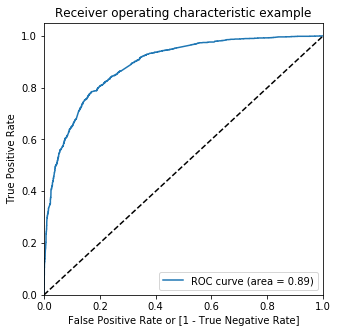

In [391]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Area under curve is 0.89 which is a good sign of model

In [392]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3629,0,0.113815,3629,1,1,0,0,0,0,0,0,0,0
493,1,0.923634,493,1,1,1,1,1,1,1,1,1,1
1330,0,0.168615,1330,1,1,0,0,0,0,0,0,0,0
4712,0,0.106031,4712,1,1,0,0,0,0,0,0,0,0
256,0,0.172912,256,1,1,0,0,0,0,0,0,0,0


In [393]:
cm1

array([[2268,   37],
       [1449,  721]], dtype=int64)

In [394]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','prec'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    prec= cm1[1,1]/(cm1[0,1]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci,prec]
print(cutoff_df)

     prob  accuracy     sensi     speci      prec
0.0   0.0  0.484916  1.000000  0.000000  0.484916
0.1   0.1  0.614749  0.990323  0.261171  0.557892
0.2   0.2  0.749497  0.944700  0.565727  0.671911
0.3   0.3  0.782123  0.917051  0.655098  0.714542
0.4   0.4  0.799330  0.825806  0.774403  0.775087
0.5   0.5  0.807598  0.776037  0.837310  0.817873
0.6   0.6  0.797989  0.722581  0.868980  0.838503
0.7   0.7  0.769385  0.611982  0.917570  0.874835
0.8   0.8  0.736536  0.504147  0.955315  0.913952
0.9   0.9  0.667933  0.332258  0.983948  0.951187


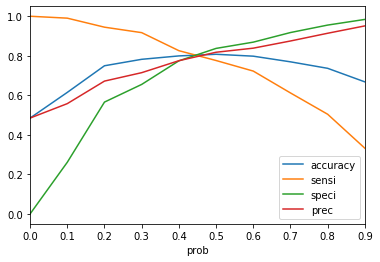

In [395]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci','prec'])
plt.show()

In [396]:
# From the ROC Curve the optimal point is between 0,4 to 0.5 .
# In our problem statement we need high precision around 80% , so choosing 0.5 as the optimal pointn.

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
3629,0,0.113815,3629,1,1,0,0,0,0,0,0,0,0,0
493,1,0.923634,493,1,1,1,1,1,1,1,1,1,1,1
1330,0,0.168615,1330,1,1,0,0,0,0,0,0,0,0,0
4712,0,0.106031,4712,1,1,0,0,0,0,0,0,0,0,0
256,0,0.172912,256,1,1,0,0,0,0,0,0,0,0,0


In [397]:
# Let's check the overall accuracy in percentage
round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)*100,2)

80.76

In [398]:
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion1

array([[1930,  375],
       [ 486, 1684]], dtype=int64)

In [399]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [400]:
print("Sensitivity of the train model : ",round(TP / float(TP+FN),2))
print("Positive predictive value / Precision of the train model  :  ",round(TP / float(TP+FP),2))

Sensitivity of the train model :  0.78
Positive predictive value / Precision of the train model  :   0.82


### Performing predictions on the test set

In [401]:
X_test[list2] = scaler.fit_transform(X_test[list2])
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Profile_Lateral Student,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Unreachable
4351,0,-0.926047,0,1,0,0,0,1,0,0,0,0,0,0,0
2514,0,1.639003,0,0,0,0,0,1,0,0,1,0,0,0,0
445,0,0.258234,0,0,0,0,0,1,0,0,0,0,0,1,0
6772,0,0.724444,0,0,0,0,0,1,0,0,0,0,0,0,0
7912,0,-0.863529,0,0,0,0,0,1,0,0,1,0,0,0,0


In [402]:
# Performing the similar dropping of column made to train set after checking P _value and VIF
X_test=X_test.drop(columns=['What is your current occupation_Housewife','Lead Profile_Lateral Student','Last Notable Activity_Had a Phone Conversation'])

In [403]:
X_test.shape

(1919, 12)

In [404]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4351    0.349071
2514    0.905587
445     0.155552
6772    0.435838
7912    0.360426
6728    0.843285
5637    0.713868
4754    0.055820
4865    0.860134
1861    0.075367
dtype: float64

In [405]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [406]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [407]:
# Putting ID to index
y_test_df['ID'] = y_test_df.index

In [408]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [409]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [410]:
y_pred_final.head(10)

,Converted,ID,0
0,0,4351,0.349071
1,1,2514,0.905587
2,0,445,0.155552
3,1,6772,0.435838
4,1,7912,0.360426
5,1,6728,0.843285
6,1,5637,0.713868
7,0,4754,0.055820
8,1,4865,0.860134
9,0,1861,0.075367


In [411]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})

In [412]:
y_pred_final.head()

,Converted,ID,Convert_Prob
0,0,4351,0.349071
1,1,2514,0.905587
2,0,445,0.155552
3,1,6772,0.435838
4,1,7912,0.360426


In [413]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [414]:
# Let's check the overall accuracy in percentage
round(100*(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)),2)

79.52

In [415]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[815, 192],
       [201, 711]], dtype=int64)

In [416]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [417]:
print("Sensitivity of the test model ",round(TP / float(TP+FN),2))

print("Positive predictive value / Precision of the test model ",round(TP / float(TP+FP) ,2))


Sensitivity of the test model  0.78
Positive predictive value / Precision of the test model  0.79


## Implementing the model in total data set to see find lead score

In [418]:
X[list2] = scaler.fit_transform(X[list2])
X = X[col]
X.head()

# Performing the similar dropping of column made to train set after checking P _value and VIF
X=X.drop(columns=['What is your current occupation_Housewife','Lead Profile_Lateral Student','Last Notable Activity_Had a Phone Conversation'])


In [419]:
X.shape

(6394, 12)

In [420]:
X_sm = sm.add_constant(X)
y_pred = res.predict(X_sm)
y_pred[:10]

0     0.174502
1     0.309350
2     0.964768
3     0.079611
4     0.450427
6     0.846666
10    0.634707
11    0.630985
12    0.818236
13    0.140352
dtype: float64

In [421]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_pred)

# Converting y_test to dataframe
y_df = pd.DataFrame(y)

In [422]:
# Putting Prospect ID to ID Column
#y_df['ID'] = y_df.index
y_df['ID'] = df_using['Prospect ID']

In [423]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_df.reset_index(drop=True, inplace=True)

In [424]:
# Appending y_df and y_pred_1
y_pred_final = pd.concat([y_df, y_pred_1],axis=1)

In [425]:
y_pred_final.head(10)

,Converted,ID,0
0,0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0.174502
1,0,2a272436-5132-4136-86fa-dcc88c88f482,0.309350
2,1,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0.964768
3,0,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0.079611
4,1,3256f628-e534-4826-9d63-4a8b88782852,0.450427
5,1,9fae7df4-169d-489b-afe4-0f3d752542ed,0.846666
6,1,2a369e35-ca95-4ca9-9e4f-9d27175aa320,0.634707
7,1,9bc8ce93-6144-49e0-9f9d-080fc980f83c,0.630985
8,1,8bf76a52-2478-476b-8618-1688e07874ad,0.818236
9,0,88867067-3750-4753-8d33-1c7d1db53b5e,0.140352


In [426]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})

In [427]:
y_pred_final.head()

,Converted,ID,Convert_Prob
0,0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0.174502
1,0,2a272436-5132-4136-86fa-dcc88c88f482,0.309350
2,1,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0.964768
3,0,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0.079611
4,1,3256f628-e534-4826-9d63-4a8b88782852,0.450427


In [428]:
# Converting the probablity to a readable score

y_pred_final['lead_score']=y_pred_final['Convert_Prob'].map(lambda x : round(100*x,0)).astype(int)

## Verifying the Values 

In [429]:
y_pred_final.sort_values(['lead_score'],ascending=[0]).head(10)

,Converted,ID,Convert_Prob,lead_score
1814,1,d0849dba-2a45-4672-9e10-12a1248e8539,0.997266,100
5545,1,c6a582ef-188a-4a5e-a949-5e60671a9482,0.997266,100
1806,1,2c0b2139-7541-4724-89ff-7b4e76ee62a5,0.997266,100
1809,1,6317608b-82f6-4279-8964-428a56c1bebe,0.997266,100
3283,1,f04442c7-78a6-476b-90bd-6910f645ad78,0.996170,100
1813,1,37465564-9752-4a25-adb0-8beeb99b7a95,0.997266,100
1815,1,35889727-7371-40f3-8451-b267a328a283,0.997266,100
1816,1,c20320d6-6059-4e80-9b3f-d774442c92c4,0.997266,100
1817,1,8dbdab2f-a5e0-4a53-88be-851bcfc9e61b,0.997266,100
1819,1,1c67c1ec-e49b-4543-b05e-e039c536bcfd,0.997266,100


In [430]:
y_pred_final.sort_values(['lead_score'],ascending=[1]).head(10)

,Converted,ID,Convert_Prob,lead_score
4170,0,2ec87cf6-7edf-4731-b37e-914e9ee14be3,0.003488,0
3942,0,02566cad-fc8f-4672-84b1-421c06d2def1,0.000790,0
5490,0,2d4236ef-fd3d-4493-9c54-db04770d5804,0.001972,0
5484,0,79613c31-0317-4ccd-b948-f3e2ec803c16,0.003481,0
5408,0,70304de3-c0b9-4234-95b6-13311b6b5f13,0.000659,0
4762,0,9a1a4075-11c3-4c69-9637-4dd24313ffc6,0.002048,0
5979,0,8e5359ca-72bf-4595-ba43-5a94cf136337,0.000911,0
2994,0,f5e30b93-414b-4c52-898d-bf39030ed3ba,0.003189,0
5989,0,2f262cb2-3aeb-4aa8-87f0-4caa68dcb328,0.000965,0
2414,0,9270e4a9-f594-48f0-9b1b-a26f627bfa02,0.001090,0


In [431]:
y_pred_final[y_pred_final['lead_score'] == 100].count()

Converted       132
ID              132
Convert_Prob    132
lead_score      132
dtype: int64

In [432]:
y_pred_final[y_pred_final['lead_score'] > 70].count()

Converted       2165
ID              2165
Convert_Prob    2165
lead_score      2165
dtype: int64

In [433]:
y_pred_final[(y_pred_final['lead_score'] > 70) & (y_pred_final['Converted'] == 0)].count()

Converted       279
ID              279
Convert_Prob    279
lead_score      279
dtype: int64

In [434]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)


# Let's check the overall accuracy in percentage
print("Accuracy of the model on full data set",round(100*(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)),2))

Accuracy of the model on full data set 80.39


In [435]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[2748,  564],
       [ 690, 2392]], dtype=int64)

In [436]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [437]:
print("Sensitivity of the whole data ",round(TP / float(TP+FN),2))

print("Positive predictive value / Precision of the whole data ",round(TP / float(TP+FP) ,2))

Sensitivity of the whole data  0.78
Positive predictive value / Precision of the whole data  0.81


### Precision 0.81 shows 81% of leads are correctly predicted by the logistic model among all hot leads . So the model can predict any data with higher precision and ll be helpful to convert hot leads into sucesful convertions .